In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from plot_keras_history import plot_history #eğitim ve test verisini görselleştirmek için
import matplotlib.pyplot as plt #görselleştirme
from keras.callbacks import EarlyStopping #erken durdurmak için

In [3]:
pip install plot_keras_history

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9458 sha256=8a47dfc7abd40e9caf40b3f955e1e8b46966c2a8bab13e69ad57f32438df46a3
  Stored in directory: /Users/yusufsoyturk/Library/Caches/pip/wheels/df/78/47/2cdf4aaece3ee5e198bf085b56e5f7980306bf5aec4616f5c1
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321865 sha256=ed0358838637049edf9185bdcefb8c9e31ee2a9a73e2089aaacd29d6536cdf30
  Stored in directory: /Users/yusufsoyturk/Library/Caches/pip/wheels/12/f9/a0/1b22139ced1d8dd9aec7e82e43937197b9d86ed4716822982d
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=5ee0ad2b559ba5273fd13d9811271b9a

In [3]:
#model başarısını ölçmek için
from sklearn.metrics import mean_squared_error #ort hata oranı


In [4]:
dataset = pd.read_excel('zomato_cleaned_dataset1.xlsx')

In [5]:
dataset.head()

,Distance,Price,Comments,Score,Alcohol_Available,Home_Delivery,Self_Service,Brunch,Sports_Broadcast,Parking_Lot,...,No_Alcohol_Available,Pet_Friendly,Additional_Feature,Music,Buffet,Luxury_Dining,Organic_Vegan_Vegetarian,Good_for_Working,World_Cuisine,Turkish_Cuisine
0,191,450.0,1737.0,4.2,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
1,183,420.0,1385.0,4.8,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
2,208,220.0,1891.0,4.1,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
3,308,260.0,511.0,4.4,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,112,280.0,603.0,4.7,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [6]:
dataset.shape

(7932, 25)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7932 entries, 0 to 7931
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Distance                  7932 non-null   int64  
 1   Price                     7932 non-null   float64
 2   Comments                  7932 non-null   float64
 3   Score                     7932 non-null   float64
 4   Alcohol_Available         7932 non-null   int64  
 5   Home_Delivery             7932 non-null   int64  
 6   Self_Service              7932 non-null   int64  
 7   Brunch                    7932 non-null   int64  
 8   Sports_Broadcast          7932 non-null   int64  
 9   Parking_Lot               7932 non-null   int64  
 10  View                      7932 non-null   int64  
 11  Outdoor_Seating           7932 non-null   int64  
 12  Internet_Phone_Charge     7932 non-null   int64  
 13  Desserts and Bakes        7932 non-null   int64  
 14  Smoking_

In [12]:
dataset.isnull().sum()

Distance                    0
Price                       0
Comments                    0
Score                       0
Alcohol_Available           0
Home_Delivery               0
Self_Service                0
Brunch                      0
Sports_Broadcast            0
Parking_Lot                 0
View                        0
Outdoor_Seating             0
Internet_Phone_Charge       0
Desserts and Bakes          0
Smoking_Area                0
No_Alcohol_Available        0
Pet_Friendly                0
Additional_Feature          0
Music                       0
Buffet                      0
Luxury_Dining               0
Organic_Vegan_Vegetarian    0
Good_for_Working            0
World_Cuisine               0
Turkish_Cuisine             0
dtype: int64

In [17]:
x = dataset.drop(['Price'], axis = 1)
y = dataset['Price'].values #values minmax için önemli

In [18]:
#veriyi standartlaştırma
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y.reshape(-1,1))


In [19]:
#Eldeki verileri test ve eğitim olmak üzere ikiye ayırıyoruz
x_train ,  x_test , y_train , y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [20]:
#ann yapay sinir ağlar
act_func = 'relu'

In [25]:
model = Sequential()
model.add(Dense (50, input_dim=24, activation = act_func))
model.add(Dense(100, activation = act_func))
model.add(Dense (50, activation = act_func))
model.add(Dense (1, activation = act_func))

# modeli compile etme
model.compile(loss='mean_squared_error', optimizer = 'rmsprop')

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1, patience = 100, restore_best_weights= True)
#model eğitme
history = model.fit(x_train, y_train, epochs = 5000, batch_size= 1024, verbose = 1, validation_split=0.25, callbacks = [es])

Epoch 1/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0163 - val_loss: 0.0053
Epoch 2/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 3/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 4/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 5/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 6/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 7/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 8/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 11/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 12/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_l

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3975e-04 - val_loss: 8.5075e-04
Epoch 133/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1096e-04 - val_loss: 8.3443e-04
Epoch 134/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0261e-04 - val_loss: 7.0810e-04
Epoch 135/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9701e-04 - val_loss: 7.5036e-04
Epoch 136/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1725e-04 - val_loss: 7.2032e-04
Epoch 137/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8786e-04 - val_loss: 8.4136e-04
Epoch 138/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4695e-04 - val_loss: 7.4023e-04
Epoch 139/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6146e-04 - val_loss: 7.0736e-04
Epoch 140/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2670e-04 - val_loss: 0.0015
Epoch 141/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - val_loss: 7.3530e-04
Epoch 142/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6754e-04 - val_loss: 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9530e-04 - val_loss: 7.5362e-04
Epoch 261/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3929e-04 - val_loss: 7.9989e-04
Epoch 262/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8872e-04 - val_loss: 7.1011e-04
Epoch 263/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9092e-04 - val_loss: 7.4248e-04
Epoch 264/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0446e-04 - val_loss: 7.7443e-04
Epoch 265/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6006e-04 - val_loss: 7.2336e-04
Epoch 266/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2681e-04 - val_loss: 8.2373e-04
Epoch 267/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.7766e-04 - val_loss: 7.1897e-04
Epoch 268/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9040e-04 - val_loss: 7.3325e-04
Epoch 269/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7270e-04 - val_loss: 7.2498e-04
Epoch 270/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8203e-04 - va

In [26]:
#tahmin 
y_hat = model.predict(x_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


In [27]:
#sınıflandırma performansı
mse = mean_squared_error(y_test, y_hat)
print('MSE : ', mse)

MSE :  0.0008329132134110597


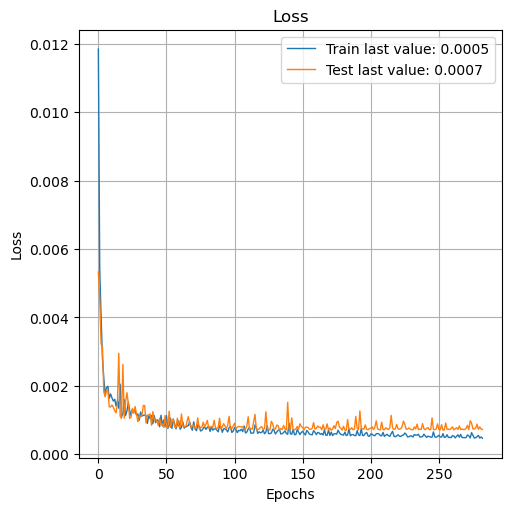

In [28]:
plot_history(history.history)
plt.show()